![Logo TUBAF](https://tu-freiberg.de/sites/default/files/media/freiberger-alumni-netzwerk-6127/wbm_orig_rgb_0.jpg)

Exercise material of the MSc-level course **Soil Dynamics**.
Held at Technische Universität Bergakademie Freiberg.

Comments to:

*Prof. Dr. Thomas Nagel  
Chair of Soil Mechanics and Foundation Engineering  
Geotechnical Institute  
Technische Universität Bergakademie Freiberg.*

https://tu-freiberg.de/en/fakultaet3/gt/soilmechanics


# Pfahl unter zyklischer Last


Module laden

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import widgets
from ipywidgets import interact
from sympy.interactive import printing
import plot_functions.plot_settings
%run plot_functions/wave1d_pile_interaction.ipynb
printing.init_printing()
%load_ext ipydex.displaytools

_Last line enables special comment **##:** for LaTeX formatting of output_ 

## Stationärer Zustand

TODO Skizze
``![wavebar_bc.png](https://github.com/nagelt/soil_dynamics/raw/master/Images/wavebar_bc.png)``

Variablen für symbolische Rechnung deklarieren (sympy)

In [2]:
A, rho, E, kappa, c, omega, z, t, C1, C2, L, F, H = sp.symbols('A rho E kappa c omega z t C1 C2 L F H')

Aus dem Ansatz $w(z,t)=f(z)sin(\omega t)$ folgt $f(z)$

In [3]:
alpha = sp.sqrt(1-(omega*H/c)**2)
f = C1*sp.cosh(alpha*z/H) + C2*sp.sinh(alpha*z/H)
dfdz = f.diff(z)

Die unbestimmten Koeffizienten $C_1$ und $C_2$ folgen aus den Randbedingungen: Kraftverlauf oben, unverschieblich unten.

In [4]:
BCtop = dfdz.subs(z, 0) + F/(E*A)
BCbottom = f.subs(z, L) 
BCsol = sp.solve([BCtop, BCbottom], C1, C2)

Einsetzen in den ursprünglichen Ansatz

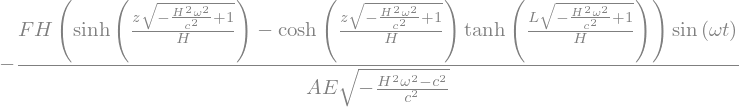

-F*H*(sinh(z*sqrt(-H**2*omega**2/c**2 + 1)/H) - cosh(z*sqrt(-H**2*omega**2/c**2 + 1)/H)*tanh(L*sqrt(-H**2*omega**2/c**2 + 1)/H))*sin(omega*t)/(A*E*sqrt(-(H**2*omega**2 - c**2)/c**2))


In [5]:
fsol = f.subs([(C1, BCsol[C1]), (C2, BCsol[C2])])
wsol = sp.simplify(fsol*sp.sin(omega*t))
display(wsol)
print(wsol)   # for safety if display fails

In [6]:
interactive_pile_plot()   

interactive(children=(IntSlider(value=5, description='$f$ [Hz]:', max=101, min=1, step=5), IntSlider(value=101…

In [7]:
#, confer wave in bar impact (arrow)